In [1]:
import numpy as np
import matplotlib.pyplot as plt
from montecarlo import MonteCarlo

# Initialization

In [2]:
# Number of rows and columns
N_i, N_j = 10, 10
# Magnetic field
epsilon = 0
# Exchange energy
J = -1
# Type of the boundary condition
BC_type = 'PBC'
# Differentiation steps
delta_epsilon = 0.001
delta_T = 0.001
# Boltzman's constant
k_B = 1

# Computation

In [3]:
lattice_1 = MonteCarlo(np.ones((N_i, N_j)), J=J)
Ts = np.linspace(0, 5, 50)
M_T = []
for T in Ts:
    lattice_1.T = T
    M_T.append(lattice_1.magnetization(100))
M_T = np.array(M_T)

/home/farid/Workspace/khu/proj/codes/montecarlo.py:111: RuntimeWarning: divide by zero encountered in scalar divide
  elif np.random.ranf() <= np.exp(-E_flip / (self.k_B * self.T)):


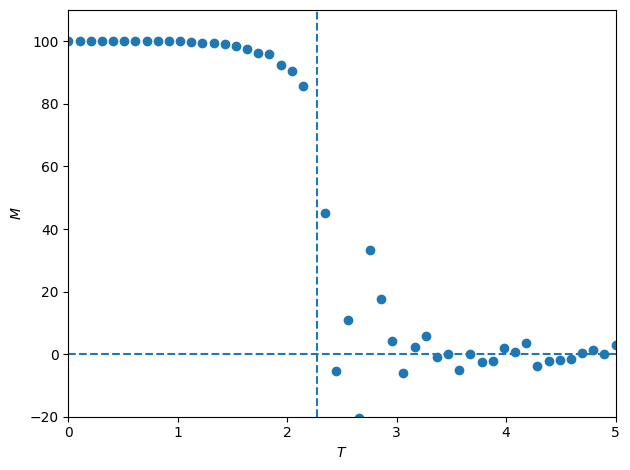

In [4]:
plt.scatter(Ts, M_T)
plt.xlabel(r'$T$')
plt.ylabel(r'$M$')
plt.xlim(Ts.min(), Ts.max())
plt.ylim(-20, 110)
plt.axhline(0, ls='--')
plt.axvline(2.27, ls='--')
plt.tight_layout()
plt.savefig('mc-M-T.png', dpi=150, bbox_inches='tight')

In [27]:
lattice_2 = MonteCarlo(np.ones((N_i, N_j)), J=J, T=1.5)
lattice_3 = MonteCarlo(np.ones((N_i, N_j)), J=J, T=2.0)
M2_s = []
M3_s = []
for _ in range(1000):
    M2_s.append(lattice_2.magnetization())
    M3_s.append(lattice_3.magnetization())
M2_s = np.array(M2_s)
M3_s = np.array(M3_s)
# M_s[M_s < 0] = - M_s[M_s < 0]

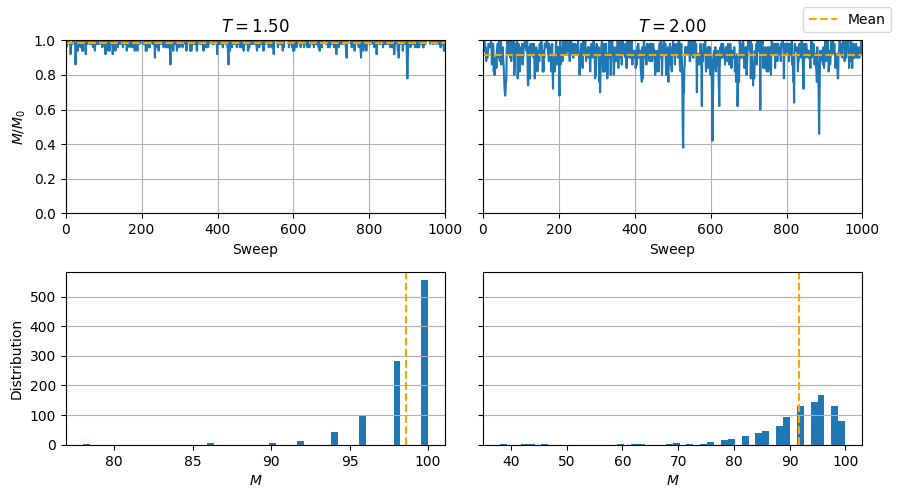

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(9, 5), sharey='row')
axes[0, 0].plot(M2_s / lattice_2.lattice.size)
axes[0, 1].plot(M3_s / lattice_3.lattice.size)
axes[0, 0].axhline(M2_s.mean() / lattice_2.lattice.size,
                   c='orange', ls='--', label='Mean')
axes[0, 1].axhline(M3_s.mean() / lattice_3.lattice.size, c='orange', ls='--')
axes[0, 0].set_title(r'$T = {:.2f}$'.format(lattice_2.T))
axes[0, 1].set_title(r'$T = {:.2f}$'.format(lattice_3.T))
axes[0, 0].set_ylabel(r'$M / M_0$')
for ax in axes[0]:
    ax.set_xlabel('Sweep')
    ax.set_xlim(0, len(M2_s))
    ax.set_ylim(0, 1)
    ax.grid()
axes[1, 0].hist(M2_s, bins=50)
axes[1, 1].hist(M3_s, bins=50)
axes[1, 0].axvline(M2_s.mean(), c='orange', ls='--')
axes[1, 1].axvline(M3_s.mean(), c='orange', ls='--')
axes[1, 0].set_xlabel(r'$M$')
axes[1, 1].set_xlabel(r'$M$')
axes[1, 0].set_ylabel(r'Distribution')
for ax in axes[1]:
    ax.grid(axis='y')
fig.legend()
fig.tight_layout()
fig.savefig('mc-M-s.png', dpi=150, bbox_inches='tight')